<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


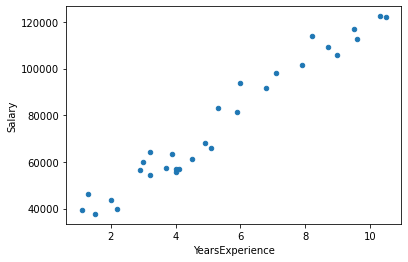

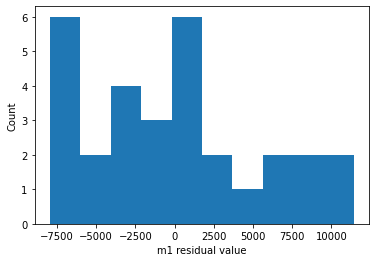

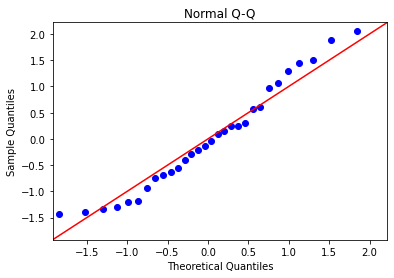

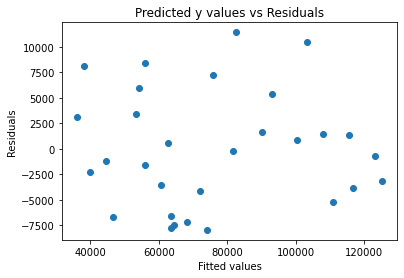

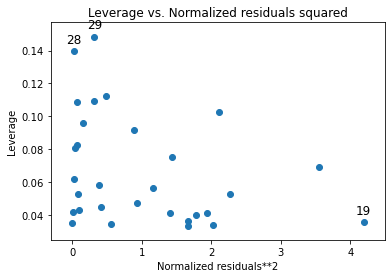

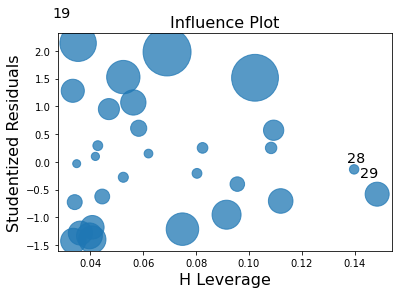

[[1.51005294 1.36011263]
 [1.43837321 1.10552744]
 [1.36669348 1.419919  ]
 [1.18749416 1.20495739]
 [1.11581443 1.33978143]
 [0.86493538 0.71830716]
 [0.82909552 0.58815781]
 [0.75741579 0.79981746]
 [0.75741579 0.42881019]
 [0.57821647 0.69801306]
 [0.50653674 0.47433279]
 [0.47069688 0.74976858]
 [0.47069688 0.70662043]
 [0.43485702 0.70201994]
 [0.29149756 0.55250402]
 [0.1481381  0.29921736]
 [0.07645838 0.37004264]
 [0.00477865 0.26285865]
 [0.21026054 0.19885989]
 [0.2461004  0.66547573]
 [0.53281931 0.58377993]
 [0.6403389  0.82623317]
 [0.92705781 0.93861127]
 [1.03457741 1.40274136]
 [1.21377673 1.24020308]
 [1.32129632 1.09740238]
 [1.50049564 1.51986835]
 [1.5363355  1.3590738 ]
 [1.78721455 1.72102849]
 [1.85889428 1.70177321]]
(array([], dtype=int64), array([], dtype=int64))


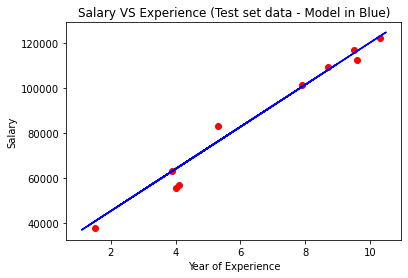

4585.415720467589

In [1]:
### Linear Regression in Python

#%%
### Assumptions that must be checked before using Simple Linear Regression

# 1) The Linearity Condition - The points between X and Y must be linear (either positive or negative)
#     This can be eyeballed through a scatterplot.

# 2) The Independence of Errors Condition - There is no relationship between the residuals and the variable; 
#     The errors should not influence each other and create a pattern. No connection between Y's.
#     Scatterplot of “residuals versus fits” - We visually check to ensure there is no relatinship. 
#     Durbin-Watson (Should be between 1-3) – Check the Durbin-Watson in the Model Summary to ensure the errors are independent.

# 3) Normality of Errors Condition - The residuals must be approximately normally distributed, in other ways the points should not be very far from or directly on the line.
#     These are indications of abnormal data.
#     Normal probability plot - the residuals should be near the line with a random pattern.
#     Histogram plot - You can also check visually through a histrogram, but a QQ plot is more widely used.


# 4) Homoscedasticity - We do not want the variance of the residuals to be the same for all values of X, or a pattern. 
#     If the plot looks like a cone shape or a tube it's a sign of homoscedasticity and there's an issue.
#     Scatterplot of “residuals versus fits” -  We are looking for no pattern and random distribution of residuals.

# 5) The Extreme Outlier Condition - Any extreme outliers should be removed to eliminate the possibility of influence on the data. 
       #Models should be run with and without outliers and compared.


# Prep data by first importing necessary packages
import matplotlib.pyplot as plt
import pandas as pd

# Then import the dataset
url = "https://raw.githubusercontent.com/LeticiaGenao/Linear_Regression_in_Python_Jupyter_Data/main/salary_data.csv"
dataset = pd.read_csv(url, index_col= False )
# dataset = pd.read_csv('./data/salary_data.csv', index_col= False ) if the file is in your respository.
# Use pd.read_csv to read your csv file into a dataframe.


# Next is data inspection - check your data and get familiar with its contents.
dataset.head()
dataset.shape
dataset.info()
dataset.describe().round(2)


# Lastly, subset your columns to X and y variables
X = dataset[['YearsExperience']]
y = dataset[['Salary']]


# Now we can check the assumptions

# Condition 1- Linearity - Check this assumption by examining a scatterplot of x and y for a linear relationship.
dataset.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.show()


# Condition 2- Independence of errors - Linear Model with a Single Predictor
# Use the ols function in the statsmodels package to best fit the line and create your model.
# Check the summary to check the OLS Regression Results for the Durbin-Watson (clost to 1<2<3) value and Prob (F-statistic) for significance.
# No constant is added by the model unless you are using formulas, such as in this case.

import statsmodels.formula.api as smf
m1 = smf.ols('Salary ~ YearsExperience', data=dataset).fit()
m1.summary()


# Condition 3 -  Normality of errors - The residuals must be approximately normally distributed.
# If this condition is not met the regression may still be run as regression is robust to the normailty condition. 

# Method 1 - Create a histogram of your model's residuals, label it, and show the plot to inspect.
plt.hist(m1.resid)
plt.xlabel('m1 residual value')
plt.ylabel('Count')
plt.show()

# Method 2 - Create a Q-Q plot of your model's residuals, fit the line, label it, and show the plot to inspect. 
# This provides a clearer inspection. Points should be close to line.
from statsmodels.graphics import gofplots
_ = gofplots.qqplot(m1.resid, fit=True, line='45')
plt.title('Normal Q-Q')
plt.show()

# Condition 4- Homoscedasticity - Equal variances
# This method is somewhat robust to violation of equal variance and the model may work without meeting the assumption.
# Develop a scatterplot of “residuals versus fits” - Check for no patterns, funnels, or cones.
plt.scatter(x=m1.fittedvalues, y=m1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Predicted y values vs Residuals')
plt.show()

# Condition 5 - No extreme outliers.

# Method 1 - One of the best ways to check is developing an Influence Plot from the statsmodel package. 
# ***Import all (*) from the reggressionplots package, use the plot_leverage_resid2 to show the outliers against the normal plots
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m1)
influence_plot(m1)
plt.show()

#Method 2 - a seaborn boxplot 
#import seaborn as sns
#sns.boxplot(x=dataset['Salary'])
# plt.show()
# sns.boxplot(x=dataset['YearsExperience'])
# plt.show()

#*** Checking Z scores can be beneficial to see siginificance.
#ZScores
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset))
print(z)

#check for outliers outside 3 standard deviations from the mean.
threshold = 3
print(np.where(z > 3))
# print(z[55][1])

#Correcting, Removing using Z
dataset = dataset[(z < 3).all(axis=1)]
dataset.shape

#Now that we know our data has met all the assumptions and can be used in predictive modelling we must seperate the data in two groups;
# 1) train set - the portion of the data we will base our model off of and apply our predictor variables to.
# 2) test set - the reserved untouched portion of the data we will test our train set against to make predicitions and apply it to the population.


# To split the dataset into the Training set and Test sets use the sklearn.model package and import the train_test_split.
# Next, label your X's and y's and set how much of the data you would like to leave untouched for the test set (1/3 in this example)
# Then,concatane(combine) the train variables, and test variables into their own datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
train_dataset = pd.concat([y_train, X_train], axis=1)
test_dataset = pd.concat([y_test, X_test], axis=1)

# Linear Model with a Single Predictor
# Develop an ols model of your train data and select your predictor variable (YearsExperience) against your dependent, and your data.
# Fit the line and check your summary for significance of the coefficient by the probability value of T.
import statsmodels.formula.api as smf
m1_train = smf.ols('Salary ~ YearsExperience', data=train_dataset).fit()
m1_train.summary()



# Evaluation - Visualizing the Test set results
# Create a plot of your train data used as a prediction against your test data. 
#The blue line will be the predicted values, and the red scattorplot is your actual untouched data.

viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, m1_train.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set data - Model in Blue)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

#Model R**2 / coeff / F / p - Check the final summary of your model for coefficient, F, and P siginficance.
m1_train.summary()




# Regression metrics - this is another way of using linear regression by the sklearn packacge.
# Check the RMSE values using the rmse_test package within sklearn.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_predicted_test = reg.predict(X_test)
rmse_test = mean_squared_error(y_test, y_predicted_test, squared=False)
rmse_test
